In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
df = pd.read_csv("flight_data.csv")

In [3]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
df.shape

(336776, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [6]:
df["delayed"] = df["arr_delay"].apply(lambda x: 1 if x > 15 else 0)

In [7]:
features = ["month","day","dep_time","sched_dep_time","dep_delay","carrier","origin","dest","distance","hour"]
target = "delayed"

In [8]:
print(df.columns.tolist())

['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour', 'delayed']


C:\Users\apran\AppData\Local\Temp\ipykernel_14844\601587421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="delayed", palette="coolwarm")


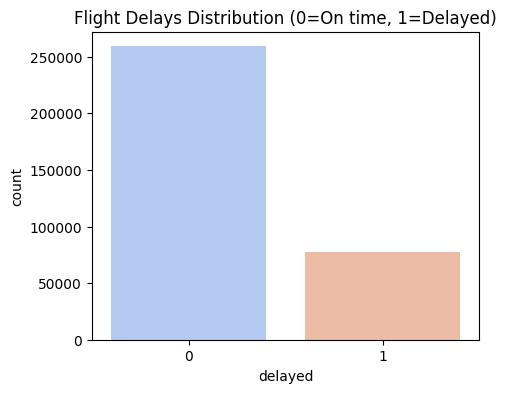

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="delayed", palette="coolwarm")
plt.title("Flight Delays Distribution (0=On time, 1=Delayed)")
plt.show()

C:\Users\apran\AppData\Local\Temp\ipykernel_14844\393724443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="month", y="arr_delay", errorbar=None, palette="viridis")


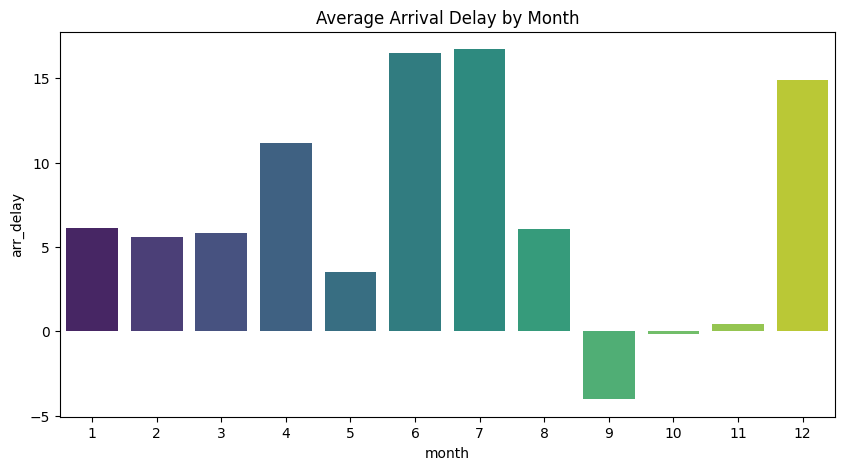

In [10]:
# Average delay per month
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="month", y="arr_delay", errorbar=None, palette="viridis")
plt.title("Average Arrival Delay by Month")
plt.show()

C:\Users\apran\AppData\Local\Temp\ipykernel_14844\733836209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="carrier", y="arr_delay", errorbar=None, palette="mako")


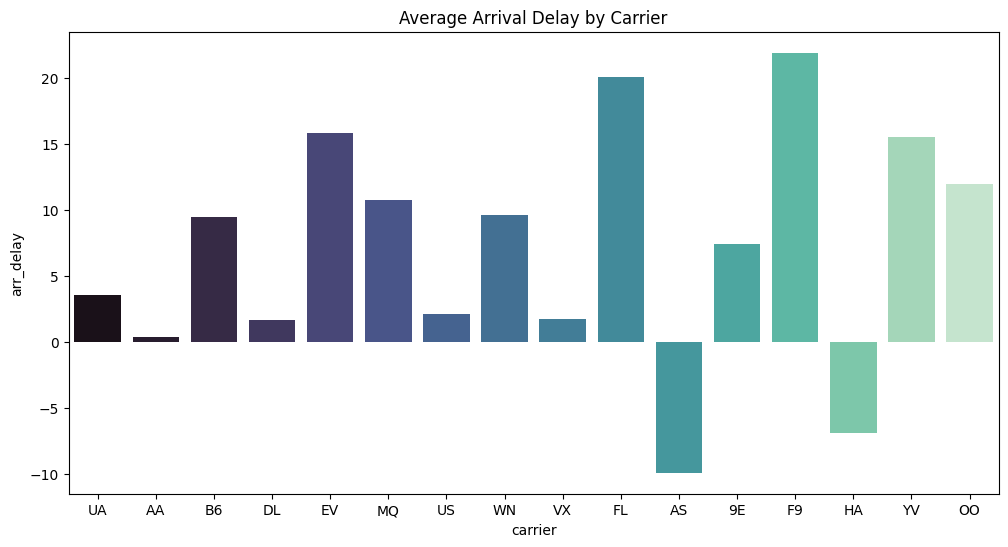

In [11]:
# Delay by carrier
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="carrier", y="arr_delay", errorbar=None, palette="mako")
plt.title("Average Arrival Delay by Carrier")
plt.show()

C:\Users\apran\AppData\Local\Temp\ipykernel_14844\287918017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="carrier", y="arr_delay", errorbar=None, palette="Set2")


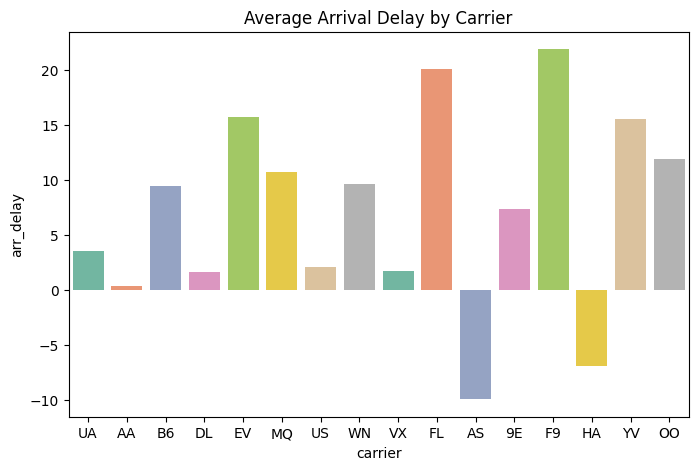

In [12]:
# Delay by carrier
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="carrier", y="arr_delay", errorbar=None, palette="Set2")
plt.title("Average Arrival Delay by Carrier")
plt.show()

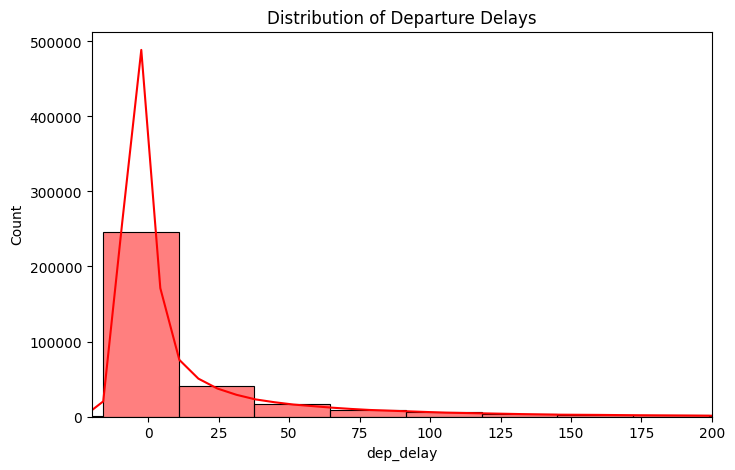

In [13]:
# Distribution of departure delays
plt.figure(figsize=(8,5))
sns.histplot(df["dep_delay"], bins=50, kde=True, color="red")
plt.xlim(-20,200)  # zoom in
plt.title("Distribution of Departure Delays")
plt.show()

In [14]:
target = "delayed"

In [15]:
# Update features to only include columns present in df
features = ['month', 'day', 'dep_delay', 'distance', 'carrier']
df = df[features + [target]].dropna()


In [16]:
df

,month,day,dep_delay,distance,carrier,delayed
0,1,1,2.0,1400,UA,0
1,1,1,4.0,1416,UA,1
2,1,1,2.0,1089,AA,1
3,1,1,-1.0,1576,B6,0
4,1,1,-6.0,762,DL,0
...,...,...,...,...,...,...
336765,9,30,-5.0,209,B6,0
336766,9,30,-10.0,301,B6,0
336767,9,30,-5.0,264,B6,0
336768,9,30,12.0,187,B6,0


In [17]:
encoders = {}
for col in ["carrier", "origin", "dest"]:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

In [18]:
X = df[features]
y = df[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], shape=(65705,))

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.897252872688532


In [25]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     50194
           1       0.83      0.70      0.76     15511

    accuracy                           0.90     65705
   macro avg       0.87      0.83      0.85     65705
weighted avg       0.89      0.90      0.89     65705



In [26]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[48035  2159]
 [ 4592 10919]]


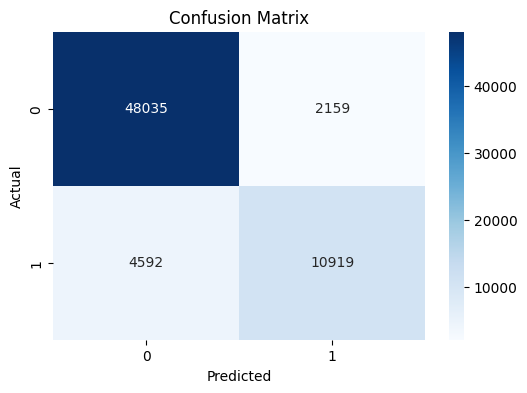

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\apran\AppData\Local\Temp\ipykernel_14844\1689605042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances, x="Importance", y="Feature", palette="coolwarm")


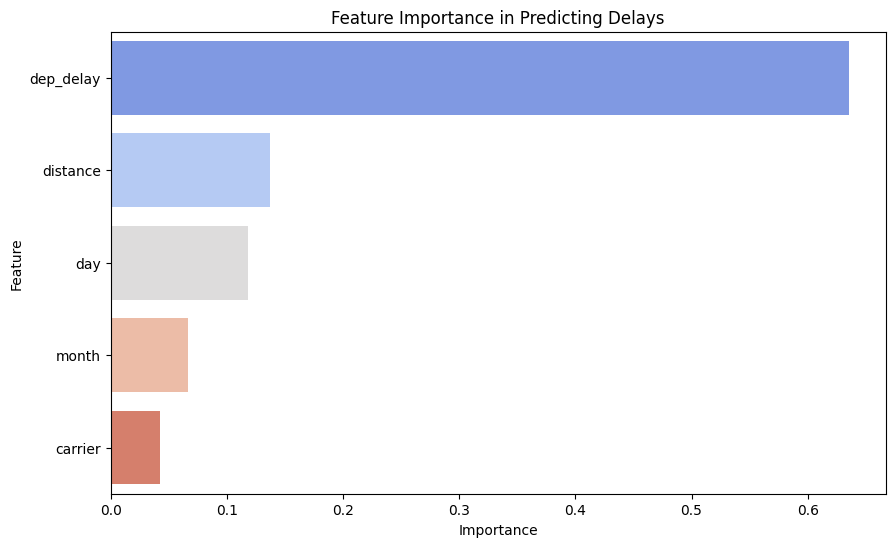

In [28]:
importances = model.feature_importances_
feat_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importances, x="Importance", y="Feature", palette="coolwarm")
plt.title("Feature Importance in Predicting Delays")
plt.show()

In [29]:
# Save trained model
joblib.dump(model, "flight_model.pkl")

['flight_model.pkl']

In [32]:
# Save label encoder for carrier column
joblib.dump(le, "encoders.pkl")

['encoders.pkl']

In [31]:
# Save feature list
joblib.dump(features, "features.pkl")

['features.pkl']